In [7]:
import sqlite3
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns  #Data Visualization
import matplotlib.pyplot as plt #Data Visualization
%matplotlib inline
connect = sqlite3.connect('database.sqlite')


In [4]:
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", connect)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [29]:
#4 countries average goals wrt leagues by season

avg_goal_countries = pd.read_sql("""SELECT COUNTRY.name AS country_name,LEAGUE.name AS league_name,season, 
                                    AVG(home_team_goal) AS avg_home_goal, AVG(away_team_goal) AS avg_away_goal,
                                    AVG(home_team_goal+away_team_goal) AS avg_goal,
                                    SUM(home_team_goal+away_team_goal) AS total_goal
                                        FROM Match
                                            JOIN Country ON country.id = Match.country_id
                                            JOIN League ON league.id = Match.league_id
                                                WHERE country_name IN ('England','Spain','Portugal','Italy')
                                                    GROUP BY COUNTRY.NAME, LEAGUE.name, season
                                                        ORDER BY COUNTRY.name,season""",connect)
avg_goal_countries

,country_name,league_name,season,avg_home_goal,avg_away_goal,avg_goal,total_goal
0,England,England Premier League,2008/2009,1.400000,1.078947,2.478947,942
1,England,England Premier League,2009/2010,1.697368,1.073684,2.771053,1053
2,England,England Premier League,2010/2011,1.623684,1.173684,2.797368,1063
3,England,England Premier League,2011/2012,1.589474,1.215789,2.805263,1066
4,England,England Premier League,2012/2013,1.557895,1.239474,2.797368,1063
5,England,England Premier League,2013/2014,1.573684,1.194737,2.768421,1052
6,England,England Premier League,2014/2015,1.473684,1.092105,2.565789,975
7,England,England Premier League,2015/2016,1.492105,1.207895,2.700000,1026
8,Italy,Italy Serie A,2008/2009,1.521053,1.078947,2.600000,988
9,Italy,Italy Serie A,2009/2010,1.542105,1.068421,2.610526,992


In [32]:
# Create dafaframe index by season, column = list of 4 countries
df = pd.DataFrame(index=np.sort(avg_goal_countries['season'].unique()), columns=avg_goal_countries['country_name'].unique())

df.loc[:,'England'] = list(avg_goal_countries.loc[avg_goal_countries['country_name']=='England','avg_goal'])
df.loc[:,'Italy']   = list(avg_goal_countries.loc[avg_goal_countries['country_name']=='Italy','avg_goal'])
df.loc[:,'Portugal'] = list(avg_goal_countries.loc[avg_goal_countries['country_name']=='Portugal','avg_goal'])
df.loc[:,'Spain']   = list(avg_goal_countries.loc[avg_goal_countries['country_name']=='Spain','avg_goal'])
df

,England,Italy,Portugal,Spain
2008/2009,2.478947,2.600000,2.300000,2.897368
2009/2010,2.771053,2.610526,2.504167,2.713158
2010/2011,2.797368,2.513158,2.433333,2.742105
2011/2012,2.805263,2.583799,2.641667,2.763158
2012/2013,2.797368,2.639474,2.779167,2.871053
2013/2014,2.768421,2.723684,2.370833,2.750000
2014/2015,2.565789,2.686016,2.493464,2.655263
2015/2016,2.700000,2.576316,2.715686,2.744737


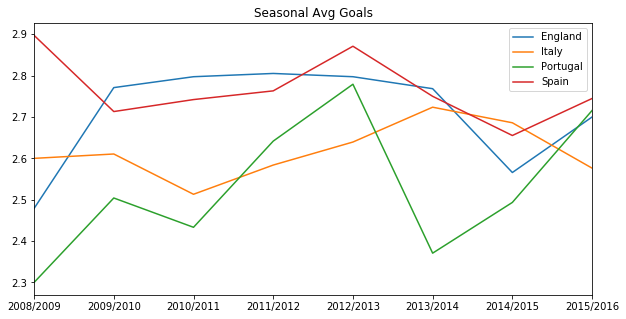

In [43]:
df.plot(figsize=(10,5),title='Seasonal Avg Goals')

In [66]:
#Focus on Spain , home vs away
df_spain= pd.DataFrame(index=np.sort(avg_goal_countries['season'].unique()), columns=['Spain_home','Spain_away'])
df_spain.loc[:,'Spain_home'] =list(avg_goal_countries.loc[avg_goal_countries['country_name']=='Spain','avg_home_goal'])

df_spain.loc[:,'Spain_away'] =list(avg_goal_countries.loc[avg_goal_countries['country_name']=='Spain','avg_away_goal'])
df_spain

,Spain_home,Spain_away
2008/2009,1.660526,1.236842
2009/2010,1.600000,1.113158
2010/2011,1.636842,1.105263
2011/2012,1.678947,1.084211
2012/2013,1.686842,1.184211
2013/2014,1.631579,1.118421
2014/2015,1.536842,1.118421
2015/2016,1.618421,1.126316


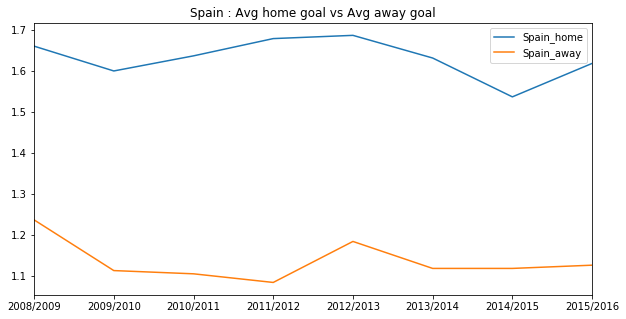

In [72]:
df_spain.plot(figsize=(10,5),title='Spain : Avg home goal vs Avg away goal')

In [2]:
#PAR = PLAYER ATTRIBUTES RATING
PAR = pd.read_sql("""SELECT * 
                       FROM Player_Attributes""",connect)
PAR.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [79]:
PAR.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [3]:
PAR=PAR.dropna()

In [81]:
PAR.isnull().sum()

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


In [86]:
PAR.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [10]:
#remove any str types.
columns = ['potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

In [11]:
correlations = [ PAR['overall_rating'].corr(PAR[i]) for i in columns ]

In [26]:
df_corr =pd.DataFrame(index=np.sort(columns), columns=['Correlations'])
df_corr.loc[:,'Correlations'] =list(correlations)

df_corr

,Correlations
acceleration,0.765435
aggression,0.357320
agility,0.330079
balance,0.313324
ball_control,0.458243
crossing,0.361739
curve,0.354191
dribbling,0.357566
finishing,0.349800
free_kick_accuracy,0.434525


Text(0.5, 1.0, 'Correlation of different attributes')

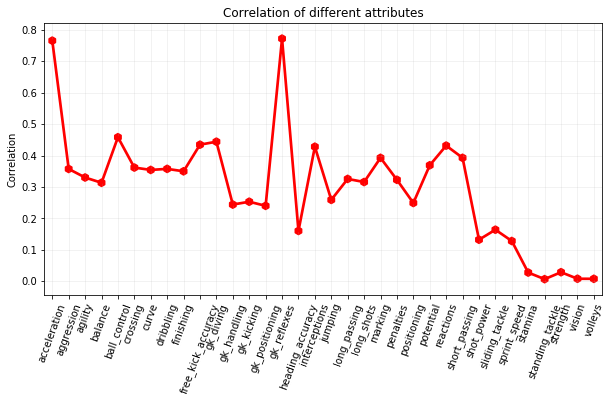

In [38]:
fig = plt.figure(figsize=(10,5))

ax = sns.pointplot(x = df_corr.index , y = df_corr.loc[:,'Correlations'],
                   color="red",markers="h")
plt.xticks(rotation = 70)
plt.grid(True,alpha=.2)
plt.ylabel("Correlation")
plt.title("Correlation of different attributes")

## Reflexes has the highest corrleation with overall rating